In [8]:
import numpy as np
import matplotlib.pyplot as plt
# http://comp-science.narod.ru/Student/SDU.htm

In [162]:
def solver(solver_step, t_start, t_end, y_start, funcs, dt=1e-2):
    t = t_start
    y = y_start.copy()
    res = [y]
    print('Start solve by: ', solver_step.__name__)
    while t < t_end:
        y = solver_step(dt, t, y, funcs)
        res.append(y)
        t = t + dt
        print('.', end='')
    print('Solved')    
    return res

<h1>Task #6 Numerical solution of ODE</h1>

<h2>Euler</h2>

In [10]:
def euler_step(dt, t, y, funcs):
    ny = [None] * len(funcs)
    for (i, f) in enumerate(funcs):
        ny[i] = y[i] + dt * f(t, y)
    return ny

In [11]:
func = [
    lambda t, y: -y[0] * 100,
    lambda t, y: -y[1],
]

In [12]:
func[1](1, [1,2,3])

-2

In [13]:
euler_step(0.1, 1.0, [1, 1], func)

[-9.0, 0.9]

<h1>Euler_Koshi</h1>

In [14]:
def euler_koshi_step(dt, t, y, funcs):
    y1 = np.zeros(len(funcs))
    ny = np.zeros(len(funcs))
    for (i, f) in enumerate(funcs):
        y1[i] = y[i] + dt * f(t, y)
    
    for (i, f) in enumerate(funcs):
        ny[i] = y[i] + dt * (f(t, y) + f(t + dt, y1)) / 2.0
    
    return ny

euler_koshi_step(0.1, 1.0, [1, 1], func)

array([41.   ,  0.905])

<h2>RK_IV</h2>

In [122]:
def rk_4_step(dt, t, y, funcs):
    sz = len(funcs)
    ny = [None] * sz
    
    two = float(2.0000000000000)
    
    k1 = np.array([dt * f(t, y) for f in funcs])
    y1 = y + k1 / two #np.array([(y[i] + k1[i] / 2.0) for i in range(sz) ])
    #print(y1, (y + k1 / 2.0))
    t1 = (t + dt / two)
    
    k2 = np.array([dt * f(t1, y1) for f in funcs])
    y2 = [(y[i] + k2[i] / two) for i in range(sz) ] #y + k2 / two#
    t2 = t1
    
    k3 = np.array([dt * f(t2, y2) for f in funcs])
    y3 = y + k3 #[(y[i] + k3[i]) for i in range(sz) ]
    t3 = (t + dt)
    
    k4 = [dt * f(t3, y3) for f in funcs]
    
    for (i, f) in enumerate(funcs):
        ny[i] = y[i] + ( k1[i] + k4[i] + two * (k2[i] + k3[i]) ) / 6.0
    return ny

In [10]:
rk_4_step(0.1, 1.0, [1, 1], func)

[291.0, 0.9048375]

<h1>Planet:</h1>

![eq](imgs/planets.jpg)

Start solve by:  euler_step
............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

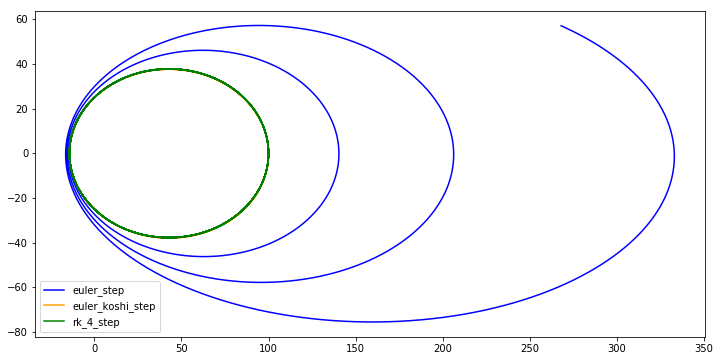

In [17]:
#               x .    y .  vx . vy
y0 = np.array([100.0, 0.0, 0.0, 5.0])

gamm_M = 10000.0 

t_start, t_end = 0.0, 24.0 *10

dt = 1e-2

planet_func = [
    lambda t, y: y[2], # dx/dt = vx
    lambda t, y: y[3], # dy/dt = vy
    
    lambda t, y: -gamm_M * y[0] / ((y[0]**2 + y[1]**2)**(3/2)), # dvx/dt = Fx
    lambda t, y: -gamm_M * y[1] / ((y[0]**2 + y[1]**2)**(3/2)), # dvy/dt = Fy
]

e_res = solver(euler_step, t_start, t_end, y0, planet_func, dt)
e_res_x = [item[0] for item in e_res]
e_res_y = [item[1] for item in e_res]



ek_res = solver(euler_koshi_step, t_start, t_end, y0, planet_func, dt)
ek_res_x = [item[0] for item in ek_res]
ek_res_y = [item[1] for item in ek_res]

rk4_res = solver(rk_4_step, t_start, t_end, y0, planet_func, dt)
rk4_res_x = [item[0] for item in rk4_res]
rk4_res_y = [item[1] for item in rk4_res]

plt.figure(figsize=(12, 6))
plt.plot(e_res_x, e_res_y, color='blue', label='euler_step')

plt.plot(ek_res_x, ek_res_y, color='orange', label='euler_koshi_step')

plt.plot(rk4_res_x, rk4_res_y, color='green', label='rk_4_step')
plt.legend(loc="lower left")
plt.show()

In [18]:
print(np.array(rk4_res_x) - np.array(ek_res_x), np.array(rk4_res_y) - np.array(ek_res_y))

[ 0.00000000e+00 -5.20117283e-12 -7.08268999e-11 ...  2.91391097e-01
  2.90620512e-01  2.89850092e-01] [ 0.00000000e+00 -8.33333568e-09 -1.66667245e-08 ...  6.13159840e-01
  6.13496911e-01  6.13833098e-01]


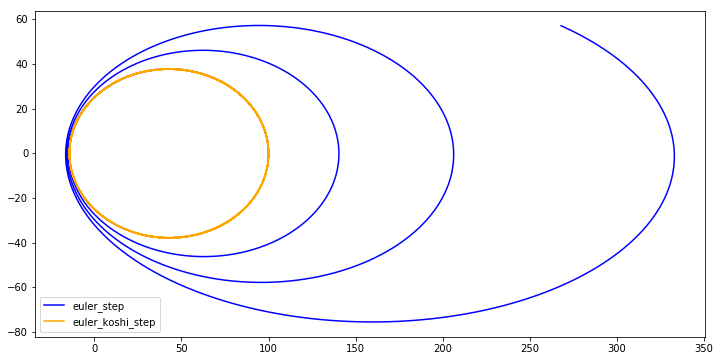

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(e_res_x, e_res_y, color='blue', label='euler_step')

plt.plot(ek_res_x, ek_res_y, color='orange', label='euler_koshi_step')

#plt.plot(rk4_res_x, rk4_res_y, color='green', label='rk_4_step')
plt.legend(loc="lower left")
plt.show()

In [80]:
plt.figure(figsize=(12, 6))
#plt.plot(e_res_x, e_res_y, color='blue', label='euler_step')

plt.plot(ek_res_x, ek_res_y, color='orange', label='euler_koshi_step')

plt.plot(rk4_res_x, rk4_res_y, color='green', label='rk_4_step')
plt.legend(loc="lower left")
plt.show()

NameError: name 'ek_res_x' is not defined

<Figure size 864x432 with 0 Axes>

In [196]:
dt = float(1e-2)
t_start = 0.0
t_end = 1.0
func = [
    lambda t, y: float(2.0000000000 * ((t) ** 2 + y[0])),
]
y0 = [1.0]
rk4_res = np.array(solver(rk_4_step, t_start, t_end, y0, func, dt))


res = np.empty(len(rk4_res))
t = t_start
i = 0
while t <= t_end + dt:
    y = 1.5 * np.exp(2.0 * t) - t * t - t - 0.5;
    res[i] = rk4_res[i]/y
    t = t + dt
    i = i + 1

np.set_printoptions(precision=99)
print(res[0::10]) #rk4_res[0::10],

Start solve by:  rk_4_step
....................................................................................................Solved
[1.                 0.9999999997563017 0.9999999994872468
 0.9999999992013031 0.9999999989066823 0.9999999986103606
 0.9999999983175697 0.9999999980317086 0.9999999977545626
 0.9999999974866595 0.9999999972276521]
